# Boolean Netowrk - Example

A Boolean network is a mathematical model that consists of a set of binary variables (i.e., variables that can take on one of two values, such as "on" or "off") and a set of logical rules that determine how the variables change over time. The variables in a Boolean network can represent the state of different components of a biological system, such as genes, proteins, or cells, and the logical rules can represent the interactions between these components. Boolean networks are important to study living systems because they provide a simple yet powerful way to model the complex dynamics of these systems. Additionally, Boolean networks can be used to analyze the robustness and evolvability of biological systems, which are important properties for understanding the behavior of living organisms.

In [ ]:
import random
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
""" get_bin takes in an integer x and an integer n, and returns 
    the binary representation of x with n digits """
get_bin = lambda x, n: format(x, 'b').zfill(n)

def RandomString(n):
  """
  RandomString takes in an integer n, generates a random list of
  n binary digits, and returns the list as a string
  """
  lista = [int(random.randint(0, 1)) for i in range(n)]
  return ''.join(map(str, lista))

##Node

In [ ]:
class Node:
    def __init__(self):
        self.inputs = []  # Regulators
        self.boolFunc = {}        # Boolean function

    def CreateInputs(self, connectivity, numNodes):
        """
        Create 'connectivity' number of inputs for the node,
        randomly selected from 'numNodes' number of possible inputs.
        """
        numbers = list(range(numNodes))
        selected = []
        for i in range(connectivity):
            chosen_number = random.choice(numbers)
            selected.append(chosen_number)
            numbers.remove(chosen_number)
        self.inputs = selected
    
    def CreateBF(self):
        """
        Create a Boolean function for the node,
        with a random output value for each possible input configuration.
        """
        connectivity = len(self.inputs)
        for i in range(2 ** connectivity):
            self.boolFunc[get_bin(i, connectivity)] = str(random.randint(0,1))


##Network

In [ ]:
class Network:
  def __init__(self):
    self.nodes = [] # list of nodes in the network
    self.k = 0 # connectivity of the network

  def CreateNetwork(self, numNodes, connectivity):
    """
    Creates a network with the specified number of nodes and connectivity.
    """
    self.k = connectivity
    for i in range(numNodes):
      n = Node()
      n.CreateInputs(connectivity, numNodes) # create inputs for each node
      n.CreateBF() # create a boolean function for each node
      self.nodes.append(n)

  def Update(self, initial_state):
    """
    Updates the state of the network based on the initial state.
    """
    next_state = ""
    for n in self.nodes:
      config = ""
      for input in n.inputs:
        config += initial_state[input]
      next_state += n.boolFunc[config]
    return next_state

  def Plot(self):
    """
    Plots a graph of the network connectivity.
    """
    G = nx.DiGraph()
    for i, n in enumerate(self.nodes):
        G.add_node(i)
        for input in n.inputs:
            G.add_edge(input, i)
    nx.draw(G)
    plt.show()

##Create a new network, update the network's state, and draw the network.

t = 0 	 0101111010
t = 1 	 1100110110
t = 2 	 1000110011
t = 3 	 0101110111
t = 4 	 1100110010
t = 5 	 1100110111
t = 6 	 1000110011
t = 7 	 0101110111
t = 8 	 1100110010
t = 9 	 1100110111


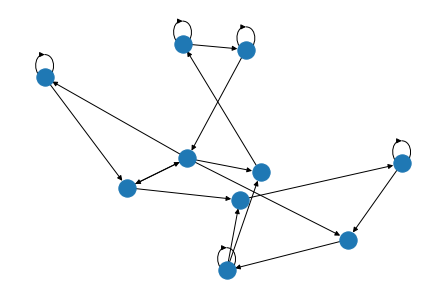

In [ ]:
# Create a network with 10 nodes and a connectivity of 2
number_nodes = 10
connectivity = 2
net = Network()
net.CreateNetwork(number_nodes, connectivity)

# Assigning a random initial condition
initial_condition = RandomString(number_nodes)

# For the next time steps update the network's state
time_steps = 10
for i in range(time_steps):
  print("t =", i, "\t", initial_condition) # Print the network state
  initial_condition = net.Update(initial_condition)

# Plot the network
net.Plot()